In [338]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics

In [339]:
datum = '/content/winequality.csv'
df = pd.read_csv(datum)

In [340]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


In [341]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


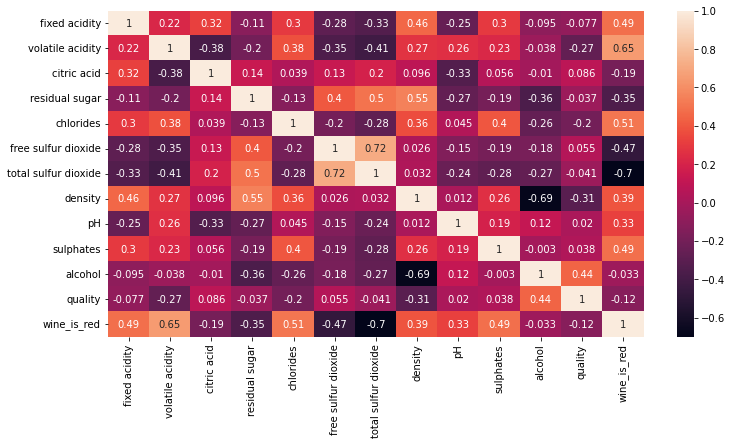

In [342]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df.corr(), annot = True)

# Handmade Knn

In [343]:
X = df.drop('wine_is_red', axis = 1)
X = np.array(X)

y = df['wine_is_red']
y = np.array(y)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [345]:
X_test

array([[ 8.9 ,  0.35,  0.4 , ...,  0.7 , 12.  ,  7.  ],
       [ 6.  ,  0.23,  0.15, ...,  0.3 ,  9.1 ,  5.  ],
       [ 5.8 ,  0.32,  0.28, ...,  0.57, 13.  ,  8.  ],
       ...,
       [ 7.1 ,  0.18,  0.32, ...,  0.54,  9.4 ,  6.  ],
       [ 7.  ,  0.15,  0.28, ...,  0.39,  9.  ,  7.  ],
       [ 7.5 ,  0.41,  0.23, ...,  0.49,  9.7 ,  5.  ]])

In [346]:
# preciso calcular a distância entre todos os dados de treinamento
# verificar os k vizinhos mais próximos (com menor distância)
# pegar o valor de 'wine_is_red' desses vizinhos e tirar a moda
# assim, classificar (0 ou 1) o valor de 'wine_is_red' de y_test

In [347]:
def knn(k):
  result = []
  euclidian_dist = []

  for x_test in X_test: 
    euclidian_dist = np.sqrt(((X_train - x_test)**2).sum(axis = 1)) # dist
    n_neighbours = np.argsort(euclidian_dist)[:k] # knn
    classif = y[n_neighbours] # vê os vizinhos
    result.append(statistics.mode(classif)) # calcula a moda
    
  return result


In [348]:
knn(5)[:20]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

## View accuracy - Binary Classification

In [349]:
from sklearn.metrics import classification_report, confusion_matrix
metrics = classification_report(y_test, knn(3))
print(metrics)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1460
           1       0.26      0.16      0.20       490

    accuracy                           0.67      1950
   macro avg       0.50      0.50      0.50      1950
weighted avg       0.63      0.67      0.64      1950



In [350]:
confusion_matrix = confusion_matrix(y_test, knn(3))

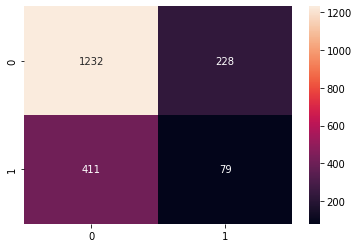

In [351]:
sns.heatmap(data = confusion_matrix, annot = True, fmt = 'd')

# Hanmade Knn - Normalized data

In [352]:
from sklearn.preprocessing import MinMaxScaler

In [353]:
df_norm = df.copy()

minmax_scaler = MinMaxScaler()

df_norm = pd.DataFrame(minmax_scaler.fit_transform(df_norm), columns = df_norm.columns)
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,0.5,1.0
2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,0.5,0.0
3,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,0.5,0.0
4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,0.5,0.0


In [354]:
X_norm = df_norm.drop('wine_is_red', axis = 1)
X_norm = np.array(X_norm)

y_norm = df_norm['wine_is_red']
y_norm = np.array(y_norm)

In [355]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size = 0.3, random_state = 0)

In [356]:
def knn_norm(k):
  result = []
  euclidian_dist = []

  for x_test_norm in X_test_norm: 
    euclidian_dist = np.sqrt(((X_train_norm - x_test_norm)**2).sum(axis = 1)) # dist
    n_neighbours = np.argsort(euclidian_dist)[:k] # knn
    classif = y[n_neighbours] # vê os vizinhos
    result.append(statistics.mode(classif)) # calcula a moda
    
  return result


## View accuracy - Normalized data - Binary Classification

In [357]:
from sklearn.metrics import classification_report, confusion_matrix
metrics_norm = classification_report(y_test_norm, knn_norm(3))
print(metrics_norm)

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      1460
         1.0       0.28      0.16      0.21       490

    accuracy                           0.69      1950
   macro avg       0.52      0.51      0.51      1950
weighted avg       0.64      0.69      0.65      1950



In [358]:
confusion_matrix_norm = confusion_matrix(y_test, knn_norm(3))

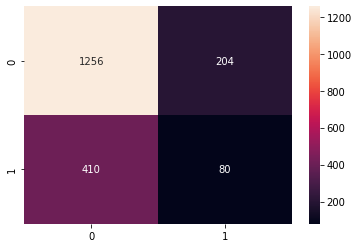

In [359]:
sns.heatmap(data = confusion_matrix_norm, annot = True, fmt = 'd')

# Feature Importance - Random Forest Regressor


* There are three ways to get feature importance from Random Forest Regressor: built-in feature importance (1), permutation based importance (2) and importance computed with SHAP values (3).

* Feature importance reduce the overfitting and also generate a dimensionality reduction.

* We got less useless data and the analisys became more accurate. 

In [360]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, random_state = 42)

In [362]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [363]:
df_columns = df.drop('wine_is_red', axis = 1)
df_columns = df_columns.columns

Text(0.5, 0, 'Random Forest Feature Importance')

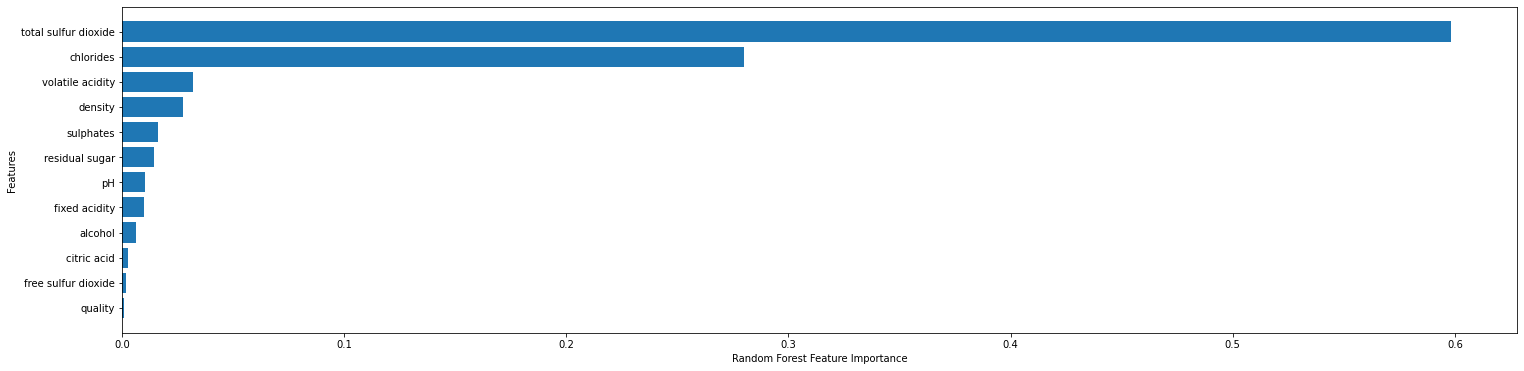

In [364]:
plt.figure(figsize = (25, 6))
sorted_features = rf.feature_importances_.argsort()
plt.barh(df_columns[sorted_features], rf.feature_importances_[sorted_features])


plt.ylabel('Features')
plt.xlabel('Random Forest Feature Importance')


In [365]:
rf.feature_importances_

array([0.00985709, 0.03186859, 0.00244459, 0.01452888, 0.27978558,
       0.00197282, 0.59812074, 0.02746251, 0.01047485, 0.01619716,
       0.00627246, 0.00101474])

* According to the tradicional Feature Importance method, the most importante features are "total sulfur dioxide" (%60) and "chlorides" (28%).

## Permutation Based Feature Importance

* The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. As arguments it requires trained model (X_train and y_train in this case) and validation (X_test and y_test in this case). This method will randomly shuffle each feature and compute the change in the model's performance. The features which impact the performance the most are the most important one.

In [366]:
from sklearn.inspection import permutation_importance

In [367]:
perm_importance = permutation_importance(rf, X_test, y_test) # rf has already trained before with X_train and y_train

<BarContainer object of 12 artists>

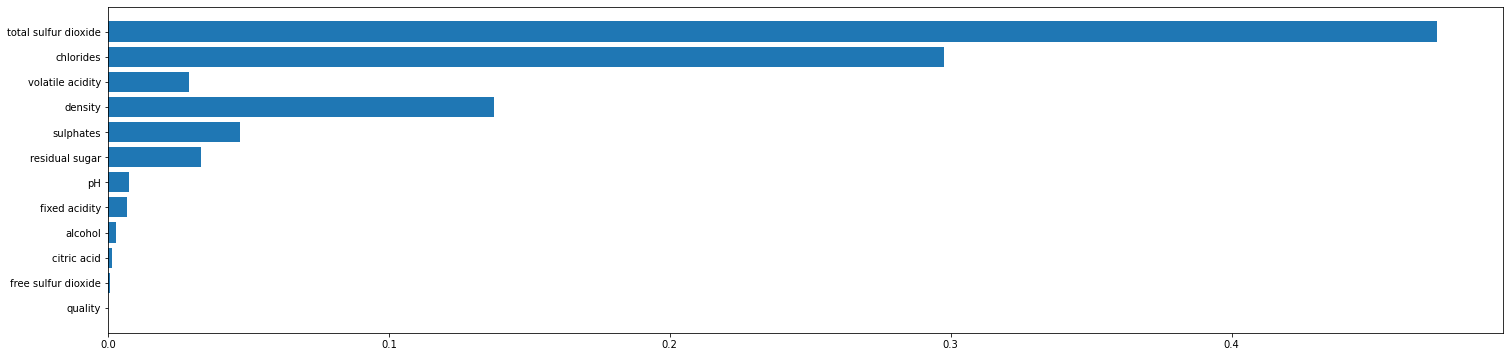

In [368]:
plt.figure(figsize = (25, 6))
sorted_features2 = rf.feature_importances_.argsort()
plt.barh(df_columns[sorted_features], perm_importance.importances_mean[sorted_features])

In [369]:
perm_importance.importances_mean[sorted_features]

array([7.49289908e-05, 6.80878907e-04, 1.54654922e-03, 2.79962099e-03,
       6.74928502e-03, 7.45866547e-03, 3.29598872e-02, 4.68631531e-02,
       1.37315318e-01, 2.89362587e-02, 2.97606472e-01, 4.73025938e-01])

## Feature Importance Computed with SHAP Values

* Model agnostic: It's independent of the model. Shap Values is simply a tool used for estimate feature importance.


In [370]:
pip install shap

In [371]:
import shap

In [ ]:
shap_explainer = shap.TreeExplainer(rf)
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

In [ ]:
shap.summary_plot(shap_values, X_test)

# Oversampling and Undersampling 

* Theses treatments are applied in unbalanced data. 

* The SMOTEENN technique is both an undersampling and oversampling aplication in the data. First, the SMOTE is applied - which more data is generate based on the minority classes. In sequence, the ENN is applied - in this case, some data that possibly generate noise is deleted in the majority classes. 

* The SMOTE generate more samples, but also generate more noise. Furthermore, the ENN drop some samples. Therefore, the union of both methods is a good choose in this dataset, because we solve these two problems.

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
smoteenn = SMOTEENN()
X_smoteenn, y_smoteenn = smoteenn.fit_resample(df.drop(columns = 'wine_is_red'), df['wine_is_red'])

In [ ]:
X_smoteenn = np.array(X_smoteenn)
y_smoteenn = np.array(y_smoteenn)

* Now, let's verify if this modifitication in the data improve or decrease the binary classification with the Knn:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smoteenn, y_smoteenn, test_size = 0.3, random_state = 0)

In [ ]:
def knn_new(k):
  result = []
  euclidian_dist = []

  for x_test in X_test: 
    euclidian_dist = np.sqrt(((X_train - x_test)**2).sum(axis = 1)) # dist
    n_neighbours = np.argsort(euclidian_dist)[:k] # knn
    classif = y[n_neighbours] # vê os vizinhos
    result.append(statistics.mode(classif)) # calcula a moda
    
  return result


## View accuracy - Oversampling and Undersampling - Binary Classification

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
metrics_new = classification_report(y_test, knn_new(3))
print(metrics_new)

In [ ]:
confusion_matrix_new = confusion_matrix(y_test, knn_new(3))

In [ ]:
sns.heatmap(data = confusion_matrix_new, annot = True, fmt = 'd')

Unfortunately, the SMOTEENN method has decrease all the classification metrics of the KNN. I suppose that the dataset has no too much undersampling and oversampling or to do both undersampling and oversampling is not a good approach.

# Multiclass classification with Sklearn - Wine Quality

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df_norm.head()

In [ ]:
df_norm['quality'].value_counts()

In [ ]:
X = df_norm.drop('quality', axis = 1)
X = np.array(X_norm)

y = df['quality']
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

* To know the assert value of k is a difficult task, so it would be interesting to discoverg the best value in a range. 

In [ ]:
# coloecting the accuracy score of diferents values of k in the range 1 to 29

k_range = range(1, 29)
score = {}
score2 = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score[k] = metrics.accuracy_score(y_test, y_pred)
  score2.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
plt.figure(figsize = (12,6))

sns.lineplot(x = k_range, y = score2)
plt.xlabel('Number os K neighbours')
plt.ylabel('Accuracy score according to K neighbours')
plt.title('Verifying the bests values of K to KNN')
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

* According to the graphic, the optimus K value is aproximately around 3. Thus, we're going to use the k = 9. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
metrics_multiclass = classification_report(y_test, y_pred)
print(metrics_multiclass)

* The metrics weren't too good, I suppose that the data is difficult to classify and KNN isn't the best classifier method

# Ensemble Learning

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier # bagging module
import xgboost as xgb # machine learnig model for prediction
from sklearn.metrics import classification_report

In [ ]:
# use the normalized data to get the machine learning process faster
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.3, random_state = 0)

In [ ]:
model = BaggingRegressor()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

In [ ]:
y_pred = np.array(y_pred, 'int')

In [ ]:
y_pred

In [ ]:
metrics_multiclass = classification_report(y_test, y_pred)
print(metrics_multiclass)

* The metrics were not too accurate, the ensemble learning is a mix of different methods of classification and regression. I suppose, despite that, this approach isn't the best one in this case.